## Table of contents:
* [Set env](#set_env)
* [General information on Reactome biopax file](#general_reactome)
    * [Query 1: Number of elements for each biopax types](#query1)
* [Complexes](#complexes)
    * [Complexes in BioPAX specifications](#complexes_in_biopax)
    * [Complexes in Reactome](#complex_reactome)
        * [Summary](#summary)
        * [Query 2: How many black-box complexes?](#query2) 
        * [Query 3: How many complexes have at least one component? ](#query3)
        * [Query 4: How many complexes have at least one component that is a complex? ](#query4)
        * [Query 5: How many complexes have at least one component, none of which is a complex? ](#query5)
        * [Query 6: How many complexes have at least one component that is a blackbox complex ](#query6)
        * [Query 7: How many complexes have at least one component that is a complex, and all its components that are complexes are actually black box complexes? ](#query7)
        * [Query 8: How many complexes have at least one component that is a complex, but not a black-box complex? ](#query8)
        * [Query 9: How many complexes, that are not black boxes, are a component of at least another complex? ](#query9)
        * [Query 10: Distribution of the number of direct components by complex ](#query10)  
        * [Query 11: Distribution of the number of complexes a complex is a component of](#query11)
        * [Query 12:  How many interactions directly involve an invalid complex? ?](#query12)
        * [Query 13: How many different components are involved in the invalid complexes?](#query13)
        * [Query 14: How many interactions directly involve a component of an invalid complex?](#query14)
        * [Query 15: How many interactions involve a complex having a direct component that is a component of an invalid complex?](#query15)
        * [Query 16: How many interactions directly and indirectly involve these components?](#query16)

    * [Identify the redundant complexes](#identify_redundant)
        * [Query 17: How many pairs of complexes have different identifiers but the same components with the same stoichiometric coefficients and the same cellular localisation?](#query17)
        * [How many cliques?](#cliques)
    * [Fix the invalid complexes](#fix_complexes)
        
        
        

### Environment <a class="anchor" id="set_env"></a>

In [1]:
import importlib
import json
import matplotlib.pyplot as plt
import os
import pandas
import rdflib
import rdflib.namespace
import sparqldataframe
import seaborn as sns
from SPARQLWrapper import SPARQLWrapper, JSON
import sys

import time
import jwt
import pathlib

import uri_utils
import complexComponents

In [2]:
reactomeVersion = 81
species = 49646
# species = 

endpointURL = "http://localhost:3030/REACTOME_CFAMILIARIS/query"
rdfFormat = "turtle"

workspace = "."
path_results = workspace+'/results-'+str(reactomeVersion)+'-'+str(species)
if not os.path.exists(path_results) :
  os.makedirs(path_results)

prefixesDict = uri_utils.readPrefixesFromFile("defaultPrefixes-release" + 
                                              str(reactomeVersion) + ".json")


In [3]:
prefixes = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs:<http://www.w3.org/2000/01/rdf-schema#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcterms: <http://purl.org/dc/terms/>

PREFIX chebi: <http://purl.obolibrary.org/obo/chebi/>
PREFIX chebidb: <http://purl.obolibrary.org/obo/CHEBI_>
PREFIX chebirel: <http://purl.obolibrary.org/obo/CHEBI#>

PREFIX up:<http://purl.uniprot.org/core/>
PREFIX udb: <http://purl.uniprot.org/database/>
PREFIX uniprot: <http://purl.uniprot.org/uniprot/>

PREFIX bp3: <http://www.biopax.org/release/biopax-level3.owl#>
PREFIX reactome: <http://www.reactome.org/biopax/""" + str(reactomeVersion)+"""/"""+str(species)+"""#>
"""

In [4]:
prefixes

'\nPREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>\nPREFIX rdfs:<http://www.w3.org/2000/01/rdf-schema#>\nPREFIX owl: <http://www.w3.org/2002/07/owl#>\nPREFIX xsd: <http://www.w3.org/2001/XMLSchema#>\n\nPREFIX dc: <http://purl.org/dc/elements/1.1/>\nPREFIX dcterms: <http://purl.org/dc/terms/>\n\nPREFIX chebi: <http://purl.obolibrary.org/obo/chebi/>\nPREFIX chebidb: <http://purl.obolibrary.org/obo/CHEBI_>\nPREFIX chebirel: <http://purl.obolibrary.org/obo/CHEBI#>\n\nPREFIX up:<http://purl.uniprot.org/core/>\nPREFIX udb: <http://purl.uniprot.org/database/>\nPREFIX uniprot: <http://purl.uniprot.org/uniprot/>\n\nPREFIX bp3: <http://www.biopax.org/release/biopax-level3.owl#>\nPREFIX reactome: <http://www.reactome.org/biopax/81/49646#>\n'

### General information on the dataset (Reactome Biopax Homo Sapiens v79) <a class="anchor" id="general_reactome"></a>

Query 1: Number of elements for each biopax types <a class="anchor" id="query1"></a>

In [5]:
## Reactome - initial file
## Version xml:base="http://www.reactome.org/biopax/81/48887#"> (2022-06)

## Number of elements for each biopax types
query="""
# Number of elements for each biopax types in reactome
SELECT ?type (COUNT(DISTINCT(?element)) AS ?nb_elements)
WHERE {
  ?element a ?type.
  FILTER(STRSTARTS(STR(?type),str(bp3:)) )
}
GROUP BY ?type
ORDER BY DESC (?nb_elements)
"""
pandas.set_option("max_colwidth", 80)
df = sparqldataframe.query(endpointURL, prefixes+query)
df

,type,nb_elements
0,http://www.biopax.org/release/biopax-level3.owl#UnificationXref,92628
1,http://www.biopax.org/release/biopax-level3.owl#SequenceSite,32300
2,http://www.biopax.org/release/biopax-level3.owl#Stoichiometry,22809
3,http://www.biopax.org/release/biopax-level3.owl#PublicationXref,21907
4,http://www.biopax.org/release/biopax-level3.owl#Protein,17252
5,http://www.biopax.org/release/biopax-level3.owl#FragmentFeature,14975
6,http://www.biopax.org/release/biopax-level3.owl#SequenceInterval,14975
7,http://www.biopax.org/release/biopax-level3.owl#Evidence,9062
8,http://www.biopax.org/release/biopax-level3.owl#PathwayStep,9035
9,http://www.biopax.org/release/biopax-level3.owl#Complex,8945


### Complexes <a class="anchor" id="complexes"></a>

#### Complexes in BioPAX specifications <a class="anchor" id="complexes_in_biopax"></a>

- **Complex** (BioPAX-level3 page 48)
    - physical product of an interaction
    - **complexes should not be defined recursively** (a complex should not be a component of another complex)
    - **exceptions are black box complexes** i.e. complexes in which the component property is empty
    - the `bp3:component` property
        - has domain: `bp3:Complex`
        - has range: `bp3:PhysicalEntity`, which subclasses are:
            - `bp3:Dna`
            - `bp3:Rna`
            - `bp3:Protein`
            - `bp3:Complex` warning: black box complexes only!
            - `bp3:SmallMolecule`
- **Black box complex**
- **Redundant complexes** are complexes having different identifiers, possibly from different databases but having the same chemical and physical properties
    - redundant complexes form equivalence classes

#### Complexes in Reactome <a class="anchor" id="complex_reactome"></a>
![](./2022_03_09_Complex_Biopax.png)

#### Summary <a class="anchor" id="summary"></a>
- complexes: 14840
- black box complexes: 858
- complexes that have at least one component: 13982
    - (complexes that are not black box complexes)
    - control: 14840-858=13982
    - they have up to 65 direct components
- complexes that have at least one component that is a complex: 6249
    - might be ok if all these components are black box complexes
    - 44.7% of 13982 
    - 42.1% of 14776 
    - control: complexes that have at least one component, none of which is a complex: 7733 (13982-6249=7733)
- complexes that have at least one component that is a black box complex: ~739~ 737
    - 11.8% of 6249 
- complexes that have at least one component that is a complex, and all its components that are complexes are actually black box complexes: ~517~ 515 
    - was expecting more, ideally 6249 
    - 8.2% of 6249 
- complexes that have at least one component that is a complex but not a black box complex: ~5710~ 5734
    - **these complexes should be fixed**
    - 38.6% of 14840
    - 41% of 13982
- complexes that are not black boxes but are a component of at least another complex: 4333
    - **they are the ones to look at for fixing the 5734**
    - they can be valid (i.e. all their components that are complexes are black box complexes) or invalid
    - they can be involved in chemical reactions (and therefore we should keep them, possibly after making them compliant and after detecting redundancies) or not (and these we can probably discard)
    -  ~1032~  of them are the direct component of more than one complex (max = direct component of 65 complexes)

Query 2: How many black-box complexes? <a class="anchor" id="query2"></a>

In [6]:
## OD
query="""
# Blackbox complexes

SELECT (COUNT(DISTINCT ?complexBB) AS ?nbComplexesBB)
WHERE {
  ?complexBB rdf:type bp3:Complex .
  FILTER NOT EXISTS {
    ?complexBB bp3:component ?complexComponent . 
  }
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

,nbComplexesBB
0,479


Query 3: How many complexes have at least one component? <a class="anchor" id="query3"></a>

In [7]:
## OD
query="""
# Complexes that have at least one component
# i.e. complexes that are not blackbox complexes

SELECT (COUNT(DISTINCT ?complex) AS ?nbComplexes)
WHERE {
  ?complex rdf:type bp3:Complex .
  ?complex bp3:component ?complexComponent . 
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

,nbComplexes
0,8466


Query 4: How many complexes have at least one component that is a complex? <a class="anchor" id="query4"></a>

In [8]:
## OD
query="""
# Complexes that have at least one component that is a complex

SELECT (COUNT(DISTINCT ?complex) AS ?nbComplexes)
WHERE {
  ?complex rdf:type bp3:Complex .
  ?complex bp3:component ?complexComponent . 
  ?complexComponent rdf:type bp3:Complex .
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

,nbComplexes
0,3833


Query 5: How many complexes have at least one component, none of which is a complex? <a class="anchor" id="query5"></a>

In [9]:
## OD
query="""
# Complexes that have at least one component, none of which is a complex

SELECT (COUNT(DISTINCT ?complex) AS ?nbComplexes)
WHERE {
  ?complex rdf:type bp3:Complex .
  ?complex bp3:component ?complexComponent . 
  FILTER NOT EXISTS {
    ?complex bp3:component ?someComplexComponent . 
    ?someComplexComponent rdf:type bp3:Complex .
  }
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

,nbComplexes
0,4633


Query 6: How many complexes have at least one component that is a blackbox complex  <a class="anchor" id="query6"></a>

In [10]:
## OD
query="""
# Complexes that have at least one component that is a blackbox complex

SELECT (COUNT(DISTINCT ?complex) AS ?nbComplexes)
WHERE {
  ?complex rdf:type bp3:Complex .
  ?complex bp3:component ?complexComponent . 
  ?complexComponent rdf:type bp3:Complex .
  FILTER NOT EXISTS {
    ?complexComponent bp3:component ?someComplexComponent . 
  }
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

,nbComplexes
0,366


Query 7: How many complexes have at least one component that is a complex, and all its components that are complexes are actually black box complexes? <a class="anchor" id="query7"></a>

In [11]:
## OD
query="""
# Complexes that have at least one component that is a complex, 
# and all its components that are complexes are actually black box complexes

SELECT (COUNT(DISTINCT ?complex) AS ?nbComplexes)
WHERE {
  ?complex rdf:type bp3:Complex .
  ?complex bp3:component ?complexComponent . 
  ?complexComponent rdf:type bp3:Complex .
  FILTER NOT EXISTS {
    ?complex bp3:component ?someComplexComponent . 
    ?someComplexComponent rdf:type bp3:Complex .
    ?someComplexComponent bp3:component ?someComplexComponentComponent .
  }
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

,nbComplexes
0,232


Query 8: How many complexes have at least one component that is a complex, but not a black-box complex? <a class="anchor" id="query8"></a>

Number of invalid complexes

In [12]:
## OD
query="""
# All invalid complexes
# Complexes that have at least one component that is a complex, but not a black box complexes

SELECT (COUNT(DISTINCT ?complex) AS ?nbComplexes)
WHERE {
  ?complex rdf:type bp3:Complex .
  ?complex bp3:component ?complexComponent . 
  ?complexComponent rdf:type bp3:Complex .
  ?complexComponent bp3:component ?someComplexComponentComponent .
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

,nbComplexes
0,3601


Query 9: How many complexes, that are not black-boxes, are a component of at least another complex? <a class="anchor" id="query9"></a>

In [13]:
## OD
query="""
# Complexes that are not black boxes but are a component of at least another complex

SELECT (COUNT(DISTINCT ?complex) AS ?nbComplexes)
WHERE {
  ?complex rdf:type bp3:Complex .
  ?complex bp3:component ?complexComponent . 
  
  ?superComplex bp3:component ?complex .
  ?superComplex rdf:type bp3:Complex .
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

,nbComplexes
0,2993


Query 10: Distribution of the number of direct components by complex <a class="anchor" id="query10"></a>

In [14]:
## OD
query="""
# Distribution of the number of direct components by complex

SELECT ?complex (COUNT(DISTINCT ?complexComponent) AS ?nbComponents)
WHERE {
  {
    ?complex rdf:type bp3:Complex .
    ?complex bp3:component ?complexComponent . 
  }
  UNION
  {
    ?complex rdf:type bp3:Complex .
    FILTER NOT EXISTS {
      ?complex bp3:component ?complexComponent . 
    }
  }
}
GROUP BY ?complex
#ORDER BY DESC(?nbComponents)
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df["nbComponents"] = pandas.to_numeric(df["nbComponents"])
#df.to_csv("./direct_components.csv")
df["nbComponents"].describe()

count    8945.000000
mean        2.313695
std         2.974695
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max        65.000000
Name: nbComponents, dtype: float64

Text(0.5, 0.98, 'Distribution of the number of direct components by complex')

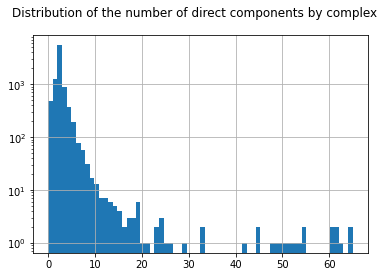

In [15]:
df['nbComponents'].hist(bins=df['nbComponents'].max()+1, log=True)
plt.suptitle("Distribution of the number of direct components by complex")

Query 11: Distribution of the number of complexes a complex is a component of<a class="anchor" id="query11"></a>

Text(0.5, 0.98, 'Distribution of the number of complexes a complex is a component of')

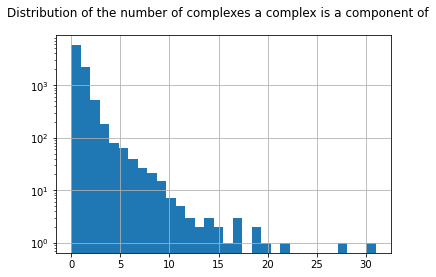

In [16]:
## OD
query="""
# Distribution of the number of complexes a complex is a component of

SELECT ?complex (COUNT(DISTINCT ?whole) AS ?nbWholes)
WHERE {
  {
    ?complex rdf:type bp3:Complex .
    ?whole bp3:component ?complex . 
  }
  UNION
  {
    ?complex rdf:type bp3:Complex .
    FILTER NOT EXISTS {
      ?whole bp3:component ?complex .
    }
  }
}
GROUP BY ?complex
#ORDER BY DESC(?nbComponents)
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df["nbWholes"] = pandas.to_numeric(df["nbWholes"])
df["nbWholes"].describe()
df["nbWholes"].hist(bins=df['nbWholes'].max()+1, log=True)
plt.suptitle("Distribution of the number of complexes a complex is a component of")

Query 12: How many interactions **directly** involve invalid complexes? <a class="anchor" id="query12"></a>

In [17]:
## CJ
query="""
#5734 invalid complexes, composed of 7119 molecules (proteins, smallmolecules et physicalentites)
SELECT (COUNT(DISTINCT ?interaction) AS ?nbInteractions)
WHERE {
  ?invalidComplex rdf:type bp3:Complex .
  ?invalidComplex bp3:component ?invalidComplexComponent . 
  ?invalidComplexComponent rdf:type bp3:Complex .
  ?invalidComplexComponent bp3:component ?componentOfInvalidComplexComponent .
  
  ?rel rdfs:subPropertyOf* bp3:participant . 
  ?interaction ?rel ?complex .
  
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

,nbInteractions
0,11957


Query 13: How many different components (proteins, small molecules et physical entites) are involved in the invalid complexes? <a class="anchor" id="query13"></a>

In [18]:
## CJ
query="""
#5734 invalid complexes, composed of 7119 molecules (proteins, smallmolecules et physicalentites)
SELECT (COUNT(DISTINCT ?leafComponent) AS ?nbInvalidComplexesComponents)
WHERE {
  ?invalidComplex rdf:type bp3:Complex .
  ?invalidComplex bp3:component ?invalidComplexComponent . 
  ?invalidComplexComponent rdf:type bp3:Complex .
  ?invalidComplexComponent bp3:component ?someComplexComponentComponent .
  
  ?invalidComplex bp3:component+ ?leafComponent .
  
  FILTER NOT EXISTS {  ?leafComponent rdf:type bp3:Complex .}
  FILTER NOT EXISTS {  ?leafComponent rdf:type bp3:Rna .}
  FILTER NOT EXISTS {  ?leafComponent rdf:type bp3:Dna .}
  FILTER NOT EXISTS {  ?leafComponent rdf:type bp3:Degradation .}
  FILTER NOT EXISTS {  ?leafComponent rdf:type bp3:BiochemicalReaction .}
  FILTER NOT EXISTS {  ?leafComponent rdf:type bp3:TemplateReaction .}
  
}
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

,nbInvalidComplexesComponents
0,5308


The 5,734 invalid complexes are (in)directly composed of 7,119 distinct entities that are not complexes, interactions, DNA or RNA. Nb: this excludes black-box complexes.

Query 14: How many interactions **directly** involve these components? <a class="anchor" id="query14"></a>

In [19]:
## CJ OD
query="""
#5734 invalid complexes, composed of 7119 molecules (proteins, smallmolecules et physicalentites)
#All interactions that have a participant that is a component of an invalid complex 

SELECT (COUNT(DISTINCT ?interact) AS ?nbInteractions)
WHERE {
  ?invalidComplex rdf:type bp3:Complex .
  ?invalidComplex bp3:component ?invalidComplexComponent .
  ?invalidComplexComponent bp3:component ?componentOfInvalidComplexComponent .
  
  ?invalidComplex bp3:component* ?leafComponent .

  FILTER NOT EXISTS {  ?leafComponent rdf:type bp3:Complex .}
  FILTER NOT EXISTS {  ?leafComponent rdf:type bp3:Rna .}
  FILTER NOT EXISTS {  ?leafComponent rdf:type bp3:Dna .}
  FILTER NOT EXISTS {  ?leafComponent rdf:type bp3:Degradation .}
  FILTER NOT EXISTS {  ?leafComponent rdf:type bp3:BiochemicalReaction .}
  FILTER NOT EXISTS {  ?leafComponent rdf:type bp3:TemplateReaction .} 
  
  ?interact ?hasParticipant ?leafComponent .
  ?hasParticipant rdfs:subPropertyOf* bp3:participant .
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

,nbInteractions
0,4286


Query 15: How many interactions involve a complex having a **direct** component that is a component of an invalid complex?  <a class="anchor" id="query15"></a>

Interactions involving a complex composed directly of a component of an invalid complex

In [20]:
query="""
# All interactions that have a participant that is a complex having a direct component that is a component of an invalid complex (excludes black-box complexes)

SELECT (COUNT(DISTINCT ?interact) AS ?nbInteractions)
WHERE {
  ?invalidComplex rdf:type bp3:Complex .
  ?invalidComplex bp3:component ?invalidComplexComponent .
  ?invalidComplexComponent bp3:component ?componentOfInvalidComplexComponent .
  
  ?invalidComplex bp3:component* ?leafComponent .

  FILTER NOT EXISTS {  ?leafComponent rdf:type bp3:Complex .}
  FILTER NOT EXISTS {  ?leafComponent rdf:type bp3:Rna .}
  FILTER NOT EXISTS {  ?leafComponent rdf:type bp3:Dna .}
  FILTER NOT EXISTS {  ?leafComponent rdf:type bp3:Degradation .}
  FILTER NOT EXISTS {  ?leafComponent rdf:type bp3:BiochemicalReaction .}
  FILTER NOT EXISTS {  ?leafComponent rdf:type bp3:TemplateReaction .}
  
  ?interactParticipant bp3:component? ?leafComponent . # 0 or 1 path
  ?interact ?hasParticipant ?interactParticipant .
  ?hasParticipant rdfs:subPropertyOf* bp3:participant .
}
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

,nbInteractions
0,6509


Query 16: How many interactions **directly** and **indirectly** involve these components? <a class="anchor" id="query16"></a>

Interactions involving a complex (valid or invalid) composed indirectly of a component of an invalid complex or the component itself

In [21]:
## CJ OD
query="""
#5734 invalid complexes, composed of 7119 molecules (proteins, smallmolecules et physicalentites)
#Interactions involving a complex composed indirectly of a component of an invalid complex

SELECT (COUNT(DISTINCT ?interact) AS ?nbInteractions)
WHERE {
  ?invalidComplex rdf:type bp3:Complex .
  ?invalidComplex bp3:component ?invalidComplexComponent .
  ?invalidComplexComponent bp3:component ?componentOfInvalidComplexComponent .
  
  ?invalidComplex bp3:component* ?leafComponent .
  
  FILTER NOT EXISTS {  ?leafComponent rdf:type bp3:Complex .}
  FILTER NOT EXISTS {  ?leafComponent rdf:type bp3:Rna .}
  FILTER NOT EXISTS {  ?leafComponent rdf:type bp3:Dna .}
  FILTER NOT EXISTS {  ?leafComponent rdf:type bp3:Degradation .}
  FILTER NOT EXISTS {  ?leafComponent rdf:type bp3:BiochemicalReaction .}
  FILTER NOT EXISTS {  ?leafComponent rdf:type bp3:TemplateReaction .}
  
  
  ?interactParticipant bp3:component* ?leafComponent . # 0 or more paths
  ?hasParticipant rdfs:subPropertyOf* bp3:participant .  
  ?interact ?hasParticipant ?interactParticipant .
}
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

,nbInteractions
0,6966


### Identify the redundant complexes <a class="anchor" id="identify_redundant"></a>

Query 17: How many pairs of complexes have different identifiers but the same components with the same stoichiometric coefficients and the same cellular location? <a class="anchor" id="query17"></a>

In [22]:
## OD CJ
query = """
# Retrieve redundant complexes i.e. pairs of complexes having different identifiers but the same components with the same stoichiometric coefficients
SELECT DISTINCT ?complex1  ?complex2 ?loc1# ?id1 ?id2 #?comp ?stoichioValue1 ?stoichioValue2

WHERE {
  #VALUES ?complex { reactome:Complex3 reactome:Complex7 reactome:Complex4 reactome:Complex5 reactome:Complex6 reactome:Complex8 reactome:Complex101 reactome:Complex102 }
  #VALUES ?complex { reactome:Complex102 }
  
  ?complex1 rdf:type bp3:Complex .
  # ?complex1 and ?complex2 have at least 1 common component (to avoid matching all the pairs of blackbox complexes that do not have any components)
  ?complex1 bp3:component ?commonComp .
  ?complex2 bp3:component ?commonComp .
  ?complex2 rdf:type bp3:Complex .
  ?complex1 bp3:cellularLocation ?loc1 .
  ?complex2 bp3:cellularLocation ?loc1 .
  FILTER (str(?complex1) < str(?complex2))
  # ?complex1 and ?complex2 do not have any common component that has different stoichiometric coefficients between the two complexes
  FILTER NOT EXISTS {
    ?complex1 bp3:component ?comp .
    ?complex2 bp3:component ?comp .
    #?complex1 bp3:cellularLocation ?loc1 .
    ?complex1 bp3:componentStoichiometry ?stoichio1 .
    ?stoichio1 bp3:physicalEntity ?comp .
    ?stoichio1 bp3:stoichiometricCoefficient ?stoichioValue1 .

    ?complex2 bp3:componentStoichiometry ?stoichio2 .
    ?stoichio2 bp3:physicalEntity ?comp .
    #?complex2 bp3:cellularLocation ?loc2 .
    ?stoichio2 bp3:stoichiometricCoefficient ?stoichioValue2 .
    FILTER (?stoichioValue1 != ?stoichioValue2)
    #FILTER (?loc1 != ?loc2)
  }


  # all the direct components of ?complex1 are also components of ?complex2
  FILTER NOT EXISTS {
    ?complex1 bp3:component ?comp1 .
    FILTER NOT EXISTS {
      ?complex2 bp3:component ?comp1 .
    }
  }
  # all the direct components of ?complex2 are also components of ?complex1
  FILTER NOT EXISTS {
    ?complex2 bp3:component ?comp2 .
    FILTER NOT EXISTS {
      ?complex1 bp3:component ?comp2 .
    }
  }
 OPTIONAL{ ?complex1 bp3:xref ?xref1 .
    ?xref1 bp3:db "ComplexPortal" .
    ?xref1 bp3:id ?id1 . }
  
OPTIONAL{ ?complex2 bp3:xref ?xref2 .
    ?xref2 bp3:db "ComplexPortal" .
    ?xref2 bp3:id ?id2 . }
}
"""
df = sparqldataframe.query(endpointURL, prefixes+query)
df

,complex1,complex2,loc1


How many cliques? <a class="anchor" id="cliques"></a>

In [23]:
cliques = {df["complex1"][0] : [df["complex2"][0]]}
for row in df.itertuples(index=False):
    if row[0] in cliques :
        cliques[row[0]].append(row[1])
    elif row[1] in cliques :
        cliques[row[1]].append(row[0])
    else :
        found = False
        for i in cliques :
            if row[0] in cliques[i]:
                cliques[i].append(row[1])
                found = True
                break
            elif row[1] in cliques[i]:
                cliques[i].append(row[0])
                found = True
                break
        if not found :
            cliques[row[0]] = list()
            cliques[row[0]].append(row[1])
       
len(cliques) 

IndexError: index 0 is out of bounds for axis 0 with size 0

* * *
### Fix the invalid complexes <a class="anchor" id="fix_complexes"></a>

- step 0: retrieve Reactome
       wget https://reactome.org/download/current/biopax.zip
       unzip biopax.zip Homo_sapiens.owl
       echo "Reactome version: $(expr "$(grep xml:base Homo_sapiens.owl)" : '.*http:\/\/www.reactome.org\/biopax\/\([[:digit:]]*\).*')"

- step 1: setup SPARQL endpoint with reactome
       # broken with fuseki-4.4.0: 
       # temporary fix
       ${FUSEKI_HOME}/fuseki-server --mem --update /reactome
       # then manually load Homo_sapiens.owl

- step 2: export the valid complexes

- step 3: export the fixed invalid complexes

- step 4: export reactome without complexes

![]("./Figure_drawio/2022_03_17_Stoichio.pdf")

Function 1: fix invalid complexes <a class="anchor" id="function1"></a>

In [24]:
def fixInvalidComplexes():
    ##### FIX INVALID COMPLEXES
    queryPath = 'queries/template-fixInvalidComplexes.rq'
    sparqlQuery = pathlib.Path(queryPath).read_text().replace('$supplementaryPrefixes$',uri_utils.convertPrefixesDictToSPARQL(prefixesDict)) 
#     sparql = SPARQLWrapper(endpointURL)
    sparql.setQuery(sparqlQuery)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
    nbInvalidComplexes = len(results["results"]["bindings"])
    i = 0
    for result in results["results"]["bindings"]:
        print("{}\t{}\t{}".format(i, time.time()-startTime, result['invalidComplex']['value']))
        validGraph = rdflib.Graph()
        validGraph.bind("bp3","http://www.biopax.org/release/biopax-level3.owl#")
        complexComponents.getRepresentationBiopaxValid(endpointURL, result['invalidComplex']['value'], prefixesDict=prefixesDict, targetGraph=validGraph, rdfFormat="turtle", biopaxFilePath="")
        with open(path_results + "/reactome-v" + str(reactomeVersion) + '-' + str(species) + "-" + result['invalidComplex']['value'].replace("http://www.reactome.org/biopax/" + str(reactomeVersion) + "/" + str(species) + "#", "") + "-valid.ttl", 'w',encoding="utf-8") as rdfFile:
            rdfFile.write(validGraph.serialize(format=rdfFormat))#.decode('UTF-8'))
        i += 1
    
     #${JENA_HOME}/bin/riot --time --output=Turtle result/reactome-v81-Complex*.ttl > reactome-v81-complexes-invalid-fixed.ttl

Function 2: export valid complexes <a class="anchor" id="function2"></a>

In [25]:
def exportValidComplexes():
    ##### EXPORT VALID PART OF REACTOME
    queryPath = 'queries/template-extractValidComplexes-construct.rq'
    sparqlQuery = pathlib.Path(queryPath).read_text().replace('$supplementaryPrefixes$',uri_utils.convertPrefixesDictToSPARQL(prefixesDict)) 
    sparql.setQuery(sparqlQuery)
    sparql.setReturnFormat(rdfFormat)
    results = sparql.query().convert()
    validGraph = rdflib.Graph()
    validGraph.parse(data=results, format=rdfFormat)

    with open(path_results + "/reactome-v" + str(reactomeVersion) + '-' + str(species) + "-complexes-valid.ttl", 'w', encoding="utf-8") as rdfFile:
        rdfFile.write(validGraph.serialize(format=rdfFormat).encode().decode('UTF-8'))

Function 3: delete all complexes  <a class="anchor" id="function3"></a>

In [26]:
def deleteAllComplexes():
    queryPath = 'queries/deleteOriginalComplexes.rq'
    sparqlQuery = pathlib.Path(queryPath).read_text().replace('$supplementaryPrefixes$',uri_utils.convertPrefixesDictToSPARQL(prefixesDict))
    print("Calling: " + endpointURL.replace("query", "update"))
    sparql = SPARQLWrapper(endpointURL.replace("query", "update"))
    sparql.setQuery(sparqlQuery)
    sparql.method = 'POST'
    #sparql.setReturnFormat(JSON)
    sparql.query()

In [27]:
validGraph = rdflib.Graph()
sparql = SPARQLWrapper(endpointURL)

In [28]:
startTime = time.time()
fixInvalidComplexes()
endTime = time.time()
print("Duration: {}".format(endTime - startTime))

0	0.20858454704284668	http://www.reactome.org/biopax/81/49646#Complex9
1	0.33894991874694824	http://www.reactome.org/biopax/81/49646#Complex12
2	0.4388868808746338	http://www.reactome.org/biopax/81/49646#Complex16
3	0.5377726554870605	http://www.reactome.org/biopax/81/49646#Complex18
4	0.6749215126037598	http://www.reactome.org/biopax/81/49646#Complex20
5	0.8359463214874268	http://www.reactome.org/biopax/81/49646#Complex34
6	2.1394481658935547	http://www.reactome.org/biopax/81/49646#Complex35
7	2.7534499168395996	http://www.reactome.org/biopax/81/49646#Complex36
8	3.2535526752471924	http://www.reactome.org/biopax/81/49646#Complex37
9	3.6369380950927734	http://www.reactome.org/biopax/81/49646#Complex38
10	3.8507866859436035	http://www.reactome.org/biopax/81/49646#Complex41
11	3.9387784004211426	http://www.reactome.org/biopax/81/49646#Complex39
12	4.086357116699219	http://www.reactome.org/biopax/81/49646#Complex47
13	4.244661808013916	http://www.reactome.org/biopax/81/49646#Complex56
14	

115	119.58955264091492	http://www.reactome.org/biopax/81/49646#Complex280
116	119.74320340156555	http://www.reactome.org/biopax/81/49646#Complex283
117	119.8874249458313	http://www.reactome.org/biopax/81/49646#Complex281
118	120.00095248222351	http://www.reactome.org/biopax/81/49646#Complex284
119	120.10808110237122	http://www.reactome.org/biopax/81/49646#Complex286
120	120.22620058059692	http://www.reactome.org/biopax/81/49646#Complex290
121	120.4094021320343	http://www.reactome.org/biopax/81/49646#Complex293
122	120.59732270240784	http://www.reactome.org/biopax/81/49646#Complex296
123	120.76434922218323	http://www.reactome.org/biopax/81/49646#Complex297
124	121.07232928276062	http://www.reactome.org/biopax/81/49646#Complex298
125	121.35334491729736	http://www.reactome.org/biopax/81/49646#Complex300
126	121.67631363868713	http://www.reactome.org/biopax/81/49646#Complex301
127	121.99541306495667	http://www.reactome.org/biopax/81/49646#Complex303
128	122.21055221557617	http://www.reacto

227	263.32686400413513	http://www.reactome.org/biopax/81/49646#Complex588
228	263.6280105113983	http://www.reactome.org/biopax/81/49646#Complex589
229	263.84425234794617	http://www.reactome.org/biopax/81/49646#Complex590
230	264.000935792923	http://www.reactome.org/biopax/81/49646#Complex591
231	264.1308579444885	http://www.reactome.org/biopax/81/49646#Complex594
232	264.2341060638428	http://www.reactome.org/biopax/81/49646#Complex596
233	264.3425691127777	http://www.reactome.org/biopax/81/49646#Complex598
234	264.4440698623657	http://www.reactome.org/biopax/81/49646#Complex599
235	264.54070019721985	http://www.reactome.org/biopax/81/49646#Complex600
236	264.64773631095886	http://www.reactome.org/biopax/81/49646#Complex601
237	264.74341011047363	http://www.reactome.org/biopax/81/49646#Complex602
238	264.83612084388733	http://www.reactome.org/biopax/81/49646#Complex603
239	264.93131828308105	http://www.reactome.org/biopax/81/49646#Complex604
240	265.0667495727539	http://www.reactome.org

339	350.5071725845337	http://www.reactome.org/biopax/81/49646#Complex867
340	350.57266879081726	http://www.reactome.org/biopax/81/49646#Complex869
341	350.942506313324	http://www.reactome.org/biopax/81/49646#Complex870
342	351.0094666481018	http://www.reactome.org/biopax/81/49646#Complex872
343	351.07366490364075	http://www.reactome.org/biopax/81/49646#Complex874
344	351.4785461425781	http://www.reactome.org/biopax/81/49646#Complex875
345	351.89550948143005	http://www.reactome.org/biopax/81/49646#Complex877
346	351.98456144332886	http://www.reactome.org/biopax/81/49646#Complex879
347	352.0814936161041	http://www.reactome.org/biopax/81/49646#Complex881
348	352.1774618625641	http://www.reactome.org/biopax/81/49646#Complex887
349	352.2658574581146	http://www.reactome.org/biopax/81/49646#Complex891
350	352.3275604248047	http://www.reactome.org/biopax/81/49646#Complex898
351	352.42981338500977	http://www.reactome.org/biopax/81/49646#Complex905
352	352.5566077232361	http://www.reactome.org/b

451	368.6051416397095	http://www.reactome.org/biopax/81/49646#Complex1125
452	368.7031955718994	http://www.reactome.org/biopax/81/49646#Complex1128
453	368.8344769477844	http://www.reactome.org/biopax/81/49646#Complex1129
454	368.93591952323914	http://www.reactome.org/biopax/81/49646#Complex1130
455	369.0005679130554	http://www.reactome.org/biopax/81/49646#Complex1136
456	369.0875267982483	http://www.reactome.org/biopax/81/49646#Complex1137
457	369.1804873943329	http://www.reactome.org/biopax/81/49646#Complex1139
458	369.2708275318146	http://www.reactome.org/biopax/81/49646#Complex1140
459	369.39101934432983	http://www.reactome.org/biopax/81/49646#Complex1143
460	369.8589835166931	http://www.reactome.org/biopax/81/49646#Complex1150
461	370.3633134365082	http://www.reactome.org/biopax/81/49646#Complex1144
462	370.498811006546	http://www.reactome.org/biopax/81/49646#Complex1146
463	370.8142764568329	http://www.reactome.org/biopax/81/49646#Complex1184
464	370.8814489841461	http://www.reac

563	387.2686948776245	http://www.reactome.org/biopax/81/49646#Complex1346
564	387.4664216041565	http://www.reactome.org/biopax/81/49646#Complex1347
565	387.6741199493408	http://www.reactome.org/biopax/81/49646#Complex1348
566	387.7764596939087	http://www.reactome.org/biopax/81/49646#Complex1349
567	387.8745503425598	http://www.reactome.org/biopax/81/49646#Complex1350
568	388.002712726593	http://www.reactome.org/biopax/81/49646#Complex1351
569	388.12842440605164	http://www.reactome.org/biopax/81/49646#Complex1352
570	388.29160356521606	http://www.reactome.org/biopax/81/49646#Complex1353
571	388.4437975883484	http://www.reactome.org/biopax/81/49646#Complex1354
572	388.6017074584961	http://www.reactome.org/biopax/81/49646#Complex1357
573	388.7060377597809	http://www.reactome.org/biopax/81/49646#Complex1359
574	388.85561990737915	http://www.reactome.org/biopax/81/49646#Complex1360
575	389.0117907524109	http://www.reactome.org/biopax/81/49646#Complex1364
576	389.1405813694	http://www.reacto

674	402.0956144332886	http://www.reactome.org/biopax/81/49646#Complex1555
675	402.36459732055664	http://www.reactome.org/biopax/81/49646#Complex1556
676	402.5530641078949	http://www.reactome.org/biopax/81/49646#Complex1558
677	402.773309469223	http://www.reactome.org/biopax/81/49646#Complex1560
678	402.92736434936523	http://www.reactome.org/biopax/81/49646#Complex1562
679	403.11312460899353	http://www.reactome.org/biopax/81/49646#Complex1565
680	403.2809216976166	http://www.reactome.org/biopax/81/49646#Complex1563
681	403.40368914604187	http://www.reactome.org/biopax/81/49646#Complex1564
682	403.5156192779541	http://www.reactome.org/biopax/81/49646#Complex1566
683	403.62636971473694	http://www.reactome.org/biopax/81/49646#Complex1567
684	403.7264416217804	http://www.reactome.org/biopax/81/49646#Complex1568
685	403.84762835502625	http://www.reactome.org/biopax/81/49646#Complex1572
686	403.99154829978943	http://www.reactome.org/biopax/81/49646#Complex1575
687	404.14098596572876	http://ww

785	420.1855001449585	http://www.reactome.org/biopax/81/49646#Complex2018
786	420.3719730377197	http://www.reactome.org/biopax/81/49646#Complex2020
787	420.46443724632263	http://www.reactome.org/biopax/81/49646#Complex2022
788	420.6194260120392	http://www.reactome.org/biopax/81/49646#Complex2024
789	420.79067635536194	http://www.reactome.org/biopax/81/49646#Complex2026
790	421.04438948631287	http://www.reactome.org/biopax/81/49646#Complex2032
791	421.3062481880188	http://www.reactome.org/biopax/81/49646#Complex2034
792	421.51887559890747	http://www.reactome.org/biopax/81/49646#Complex2037
793	421.68658423423767	http://www.reactome.org/biopax/81/49646#Complex2041
794	421.84964990615845	http://www.reactome.org/biopax/81/49646#Complex2044
795	421.9817228317261	http://www.reactome.org/biopax/81/49646#Complex2046
796	422.1120011806488	http://www.reactome.org/biopax/81/49646#Complex2048
797	422.27700662612915	http://www.reactome.org/biopax/81/49646#Complex2050
798	422.4670009613037	http://ww

897	439.62977147102356	http://www.reactome.org/biopax/81/49646#Complex2296
898	439.7345414161682	http://www.reactome.org/biopax/81/49646#Complex2297
899	440.0796809196472	http://www.reactome.org/biopax/81/49646#Complex2298
900	440.1715614795685	http://www.reactome.org/biopax/81/49646#Complex2299
901	440.54543352127075	http://www.reactome.org/biopax/81/49646#Complex2300
902	440.9253177642822	http://www.reactome.org/biopax/81/49646#Complex2301
903	441.3086042404175	http://www.reactome.org/biopax/81/49646#Complex2302
904	441.7447090148926	http://www.reactome.org/biopax/81/49646#Complex2303
905	442.2192416191101	http://www.reactome.org/biopax/81/49646#Complex2304
906	442.7404851913452	http://www.reactome.org/biopax/81/49646#Complex2305
907	443.22119522094727	http://www.reactome.org/biopax/81/49646#Complex2307
908	443.7233076095581	http://www.reactome.org/biopax/81/49646#Complex2309
909	444.06858110427856	http://www.reactome.org/biopax/81/49646#Complex2310
910	444.4212455749512	http://www.r

1009	464.07389187812805	http://www.reactome.org/biopax/81/49646#Complex2492
1010	464.14143919944763	http://www.reactome.org/biopax/81/49646#Complex2495
1011	464.2082188129425	http://www.reactome.org/biopax/81/49646#Complex2498
1012	464.3143594264984	http://www.reactome.org/biopax/81/49646#Complex2500
1013	464.4063138961792	http://www.reactome.org/biopax/81/49646#Complex2504
1014	464.5354013442993	http://www.reactome.org/biopax/81/49646#Complex2506
1015	464.6373407840729	http://www.reactome.org/biopax/81/49646#Complex2507
1016	464.70345520973206	http://www.reactome.org/biopax/81/49646#Complex2508
1017	464.76985335350037	http://www.reactome.org/biopax/81/49646#Complex2509
1018	464.89843797683716	http://www.reactome.org/biopax/81/49646#Complex2511
1019	464.9624226093292	http://www.reactome.org/biopax/81/49646#Complex2512
1020	465.09126448631287	http://www.reactome.org/biopax/81/49646#Complex2514
1021	465.2562336921692	http://www.reactome.org/biopax/81/49646#Complex2515
1022	465.3482582569

1118	481.7051434516907	http://www.reactome.org/biopax/81/49646#Complex2758
1119	481.88616585731506	http://www.reactome.org/biopax/81/49646#Complex2760
1120	482.23616194725037	http://www.reactome.org/biopax/81/49646#Complex2761
1121	482.52058696746826	http://www.reactome.org/biopax/81/49646#Complex2763
1122	482.8862979412079	http://www.reactome.org/biopax/81/49646#Complex2764
1123	483.2071433067322	http://www.reactome.org/biopax/81/49646#Complex2765
1124	483.47326374053955	http://www.reactome.org/biopax/81/49646#Complex2767
1125	483.75415229797363	http://www.reactome.org/biopax/81/49646#Complex2770
1126	483.8310787677765	http://www.reactome.org/biopax/81/49646#Complex2772
1127	483.97915387153625	http://www.reactome.org/biopax/81/49646#Complex2773
1128	484.0534145832062	http://www.reactome.org/biopax/81/49646#Complex2774
1129	484.15812373161316	http://www.reactome.org/biopax/81/49646#Complex2776
1130	484.2591862678528	http://www.reactome.org/biopax/81/49646#Complex2778
1131	484.435327768

1227	519.3891289234161	http://www.reactome.org/biopax/81/49646#Complex2955
1228	519.493011713028	http://www.reactome.org/biopax/81/49646#Complex2956
1229	519.6254007816315	http://www.reactome.org/biopax/81/49646#Complex2957
1230	519.7931416034698	http://www.reactome.org/biopax/81/49646#Complex2958
1231	519.919459104538	http://www.reactome.org/biopax/81/49646#Complex2961
1232	520.1464500427246	http://www.reactome.org/biopax/81/49646#Complex2959
1233	520.2341384887695	http://www.reactome.org/biopax/81/49646#Complex2962
1234	520.38654255867	http://www.reactome.org/biopax/81/49646#Complex2963
1235	520.4846758842468	http://www.reactome.org/biopax/81/49646#Complex2965
1236	520.6319017410278	http://www.reactome.org/biopax/81/49646#Complex2967
1237	520.7990524768829	http://www.reactome.org/biopax/81/49646#Complex2968
1238	520.975424528122	http://www.reactome.org/biopax/81/49646#Complex2970
1239	521.1419801712036	http://www.reactome.org/biopax/81/49646#Complex2976
1240	521.3578708171844	http://

1337	549.8220076560974	http://www.reactome.org/biopax/81/49646#Complex3247
1338	550.2456369400024	http://www.reactome.org/biopax/81/49646#Complex3250
1339	550.6914465427399	http://www.reactome.org/biopax/81/49646#Complex3251
1340	550.9496281147003	http://www.reactome.org/biopax/81/49646#Complex3252
1341	551.2879180908203	http://www.reactome.org/biopax/81/49646#Complex3255
1342	551.3542759418488	http://www.reactome.org/biopax/81/49646#Complex3256
1343	551.6722927093506	http://www.reactome.org/biopax/81/49646#Complex3257
1344	552.0759127140045	http://www.reactome.org/biopax/81/49646#Complex3258
1345	552.3290708065033	http://www.reactome.org/biopax/81/49646#Complex3259
1346	552.6462700366974	http://www.reactome.org/biopax/81/49646#Complex3262
1347	552.7888915538788	http://www.reactome.org/biopax/81/49646#Complex3263
1348	552.9519174098969	http://www.reactome.org/biopax/81/49646#Complex3265
1349	553.1915428638458	http://www.reactome.org/biopax/81/49646#Complex3268
1350	553.4794254302979	ht

1448	589.2392938137054	http://www.reactome.org/biopax/81/49646#Complex3545
1449	589.3079695701599	http://www.reactome.org/biopax/81/49646#Complex3548
1450	589.4142439365387	http://www.reactome.org/biopax/81/49646#Complex3546
1451	589.4541175365448	http://www.reactome.org/biopax/81/49646#Complex3565
1452	589.6283736228943	http://www.reactome.org/biopax/81/49646#Complex3566
1453	589.8370423316956	http://www.reactome.org/biopax/81/49646#Complex3567
1454	590.0498504638672	http://www.reactome.org/biopax/81/49646#Complex3568
1455	590.2261600494385	http://www.reactome.org/biopax/81/49646#Complex3569
1456	590.342844247818	http://www.reactome.org/biopax/81/49646#Complex3573
1457	590.4184453487396	http://www.reactome.org/biopax/81/49646#Complex3574
1458	590.5389583110809	http://www.reactome.org/biopax/81/49646#Complex3575
1459	590.705974817276	http://www.reactome.org/biopax/81/49646#Complex3577
1460	590.94349193573	http://www.reactome.org/biopax/81/49646#Complex3581
1461	591.233936548233	http://

1558	608.3858025074005	http://www.reactome.org/biopax/81/49646#Complex3830
1559	608.4600801467896	http://www.reactome.org/biopax/81/49646#Complex3834
1560	608.9369175434113	http://www.reactome.org/biopax/81/49646#Complex3835
1561	609.3574452400208	http://www.reactome.org/biopax/81/49646#Complex3836
1562	609.4560031890869	http://www.reactome.org/biopax/81/49646#Complex3839
1563	609.9991166591644	http://www.reactome.org/biopax/81/49646#Complex3840
1564	610.3191246986389	http://www.reactome.org/biopax/81/49646#Complex3841
1565	610.7308478355408	http://www.reactome.org/biopax/81/49646#Complex3842
1566	611.1839621067047	http://www.reactome.org/biopax/81/49646#Complex3843
1567	611.6242821216583	http://www.reactome.org/biopax/81/49646#Complex3844
1568	612.0717470645905	http://www.reactome.org/biopax/81/49646#Complex3846
1569	612.6949484348297	http://www.reactome.org/biopax/81/49646#Complex3847
1570	613.1891906261444	http://www.reactome.org/biopax/81/49646#Complex3848
1571	613.6638555526733	ht

1668	662.6798422336578	http://www.reactome.org/biopax/81/49646#Complex3998
1669	663.4016931056976	http://www.reactome.org/biopax/81/49646#Complex3999
1670	664.2638576030731	http://www.reactome.org/biopax/81/49646#Complex4000
1671	665.0572733879089	http://www.reactome.org/biopax/81/49646#Complex4001
1672	665.1966514587402	http://www.reactome.org/biopax/81/49646#Complex4003
1673	665.3147141933441	http://www.reactome.org/biopax/81/49646#Complex4004
1674	666.2461569309235	http://www.reactome.org/biopax/81/49646#Complex4005
1675	667.057888507843	http://www.reactome.org/biopax/81/49646#Complex4008
1676	668.2316734790802	http://www.reactome.org/biopax/81/49646#Complex4009
1677	669.4515972137451	http://www.reactome.org/biopax/81/49646#Complex4010
1678	670.675904750824	http://www.reactome.org/biopax/81/49646#Complex4011
1679	671.8467125892639	http://www.reactome.org/biopax/81/49646#Complex4012
1680	673.049665927887	http://www.reactome.org/biopax/81/49646#Complex4013
1681	673.5026984214783	http:

1778	745.8494656085968	http://www.reactome.org/biopax/81/49646#Complex4141
1779	746.2693302631378	http://www.reactome.org/biopax/81/49646#Complex4142
1780	746.329404592514	http://www.reactome.org/biopax/81/49646#Complex4145
1781	746.9801964759827	http://www.reactome.org/biopax/81/49646#Complex4146
1782	747.5390272140503	http://www.reactome.org/biopax/81/49646#Complex4147
1783	747.9845240116119	http://www.reactome.org/biopax/81/49646#Complex4150
1784	748.6265549659729	http://www.reactome.org/biopax/81/49646#Complex4151
1785	748.733827829361	http://www.reactome.org/biopax/81/49646#Complex4154
1786	749.8605279922485	http://www.reactome.org/biopax/81/49646#Complex4156
1787	750.5077188014984	http://www.reactome.org/biopax/81/49646#Complex4158
1788	751.1524095535278	http://www.reactome.org/biopax/81/49646#Complex4159
1789	751.2456758022308	http://www.reactome.org/biopax/81/49646#Complex4161
1790	751.3953778743744	http://www.reactome.org/biopax/81/49646#Complex4164
1791	751.75838804245	http:/

1888	933.3970420360565	http://www.reactome.org/biopax/81/49646#Complex4352
1889	933.4874224662781	http://www.reactome.org/biopax/81/49646#Complex4355
1890	933.8580296039581	http://www.reactome.org/biopax/81/49646#Complex4357
1891	934.4099869728088	http://www.reactome.org/biopax/81/49646#Complex4359
1892	934.4999985694885	http://www.reactome.org/biopax/81/49646#Complex4361
1893	934.5878014564514	http://www.reactome.org/biopax/81/49646#Complex4363
1894	935.1461129188538	http://www.reactome.org/biopax/81/49646#Complex4365
1895	935.2599613666534	http://www.reactome.org/biopax/81/49646#Complex4367
1896	935.7280054092407	http://www.reactome.org/biopax/81/49646#Complex4381
1897	935.9890308380127	http://www.reactome.org/biopax/81/49646#Complex4383
1898	936.5559570789337	http://www.reactome.org/biopax/81/49646#Complex4386
1899	936.8498024940491	http://www.reactome.org/biopax/81/49646#Complex4387
1900	937.1357364654541	http://www.reactome.org/biopax/81/49646#Complex4390
1901	947.0150232315063	ht

1998	1034.5210585594177	http://www.reactome.org/biopax/81/49646#Complex4792
1999	1034.7347600460052	http://www.reactome.org/biopax/81/49646#Complex4793
2000	1034.9526453018188	http://www.reactome.org/biopax/81/49646#Complex4794
2001	1035.0225250720978	http://www.reactome.org/biopax/81/49646#Complex4795
2002	1035.1191954612732	http://www.reactome.org/biopax/81/49646#Complex4798
2003	1035.9666452407837	http://www.reactome.org/biopax/81/49646#Complex4799
2004	1036.7988748550415	http://www.reactome.org/biopax/81/49646#Complex4802
2005	1036.9458870887756	http://www.reactome.org/biopax/81/49646#Complex4803
2006	1037.1504998207092	http://www.reactome.org/biopax/81/49646#Complex4804
2007	1037.2907950878143	http://www.reactome.org/biopax/81/49646#Complex4805
2008	1037.4350757598877	http://www.reactome.org/biopax/81/49646#Complex4817
2009	1037.6016793251038	http://www.reactome.org/biopax/81/49646#Complex4818
2010	1037.6972286701202	http://www.reactome.org/biopax/81/49646#Complex4820
2011	1037.90

2107	1063.3497066497803	http://www.reactome.org/biopax/81/49646#Complex5018
2108	1063.5356616973877	http://www.reactome.org/biopax/81/49646#Complex5021
2109	1063.750503540039	http://www.reactome.org/biopax/81/49646#Complex5023
2110	1063.8484482765198	http://www.reactome.org/biopax/81/49646#Complex5025
2111	1063.978008031845	http://www.reactome.org/biopax/81/49646#Complex5026
2112	1064.136396408081	http://www.reactome.org/biopax/81/49646#Complex5028
2113	1064.2585213184357	http://www.reactome.org/biopax/81/49646#Complex5031
2114	1064.3815240859985	http://www.reactome.org/biopax/81/49646#Complex5029
2115	1064.4785256385803	http://www.reactome.org/biopax/81/49646#Complex5035
2116	1064.7096316814423	http://www.reactome.org/biopax/81/49646#Complex5039
2117	1064.9750735759735	http://www.reactome.org/biopax/81/49646#Complex5036
2118	1065.1278131008148	http://www.reactome.org/biopax/81/49646#Complex5037
2119	1065.250426530838	http://www.reactome.org/biopax/81/49646#Complex5040
2120	1065.519551

2216	1081.8528468608856	http://www.reactome.org/biopax/81/49646#Complex5209
2217	1082.357792854309	http://www.reactome.org/biopax/81/49646#Complex5210
2218	1082.8321332931519	http://www.reactome.org/biopax/81/49646#Complex5212
2219	1083.1441085338593	http://www.reactome.org/biopax/81/49646#Complex5213
2220	1083.3339500427246	http://www.reactome.org/biopax/81/49646#Complex5216
2221	1083.8196675777435	http://www.reactome.org/biopax/81/49646#Complex5217
2222	1084.2525165081024	http://www.reactome.org/biopax/81/49646#Complex5219
2223	1084.5756494998932	http://www.reactome.org/biopax/81/49646#Complex5220
2224	1084.76264834404	http://www.reactome.org/biopax/81/49646#Complex5223
2225	1085.0246489048004	http://www.reactome.org/biopax/81/49646#Complex5233
2226	1085.14178109169	http://www.reactome.org/biopax/81/49646#Complex5235
2227	1085.2966504096985	http://www.reactome.org/biopax/81/49646#Complex5236
2228	1085.4029066562653	http://www.reactome.org/biopax/81/49646#Complex5238
2229	1086.0896291

2326	1102.597686290741	http://www.reactome.org/biopax/81/49646#Complex5795
2327	1102.6794974803925	http://www.reactome.org/biopax/81/49646#Complex5797
2328	1102.7968339920044	http://www.reactome.org/biopax/81/49646#Complex5800
2329	1102.8723547458649	http://www.reactome.org/biopax/81/49646#Complex5803
2330	1102.9483559131622	http://www.reactome.org/biopax/81/49646#Complex5804
2331	1103.0157713890076	http://www.reactome.org/biopax/81/49646#Complex5807
2332	1103.1204223632812	http://www.reactome.org/biopax/81/49646#Complex5808
2333	1103.2779536247253	http://www.reactome.org/biopax/81/49646#Complex5837
2334	1103.3723375797272	http://www.reactome.org/biopax/81/49646#Complex5849
2335	1103.5110721588135	http://www.reactome.org/biopax/81/49646#Complex5851
2336	1103.6499202251434	http://www.reactome.org/biopax/81/49646#Complex5853
2337	1103.7556488513947	http://www.reactome.org/biopax/81/49646#Complex5854
2338	1103.9827508926392	http://www.reactome.org/biopax/81/49646#Complex5866
2339	1104.112

2436	1148.4472479820251	http://www.reactome.org/biopax/81/49646#Complex6272
2437	1148.518473148346	http://www.reactome.org/biopax/81/49646#Complex6280
2438	1148.7656145095825	http://www.reactome.org/biopax/81/49646#Complex6282
2439	1148.972244501114	http://www.reactome.org/biopax/81/49646#Complex6284
2440	1149.1793966293335	http://www.reactome.org/biopax/81/49646#Complex6287
2441	1149.2752213478088	http://www.reactome.org/biopax/81/49646#Complex6292
2442	1149.3666050434113	http://www.reactome.org/biopax/81/49646#Complex6295
2443	1149.470199584961	http://www.reactome.org/biopax/81/49646#Complex6308
2444	1149.5669140815735	http://www.reactome.org/biopax/81/49646#Complex6331
2445	1149.6642062664032	http://www.reactome.org/biopax/81/49646#Complex6337
2446	1149.7592968940735	http://www.reactome.org/biopax/81/49646#Complex6339
2447	1149.826413154602	http://www.reactome.org/biopax/81/49646#Complex6342
2448	1149.9748907089233	http://www.reactome.org/biopax/81/49646#Complex6345
2449	1150.046761

2545	1285.3059701919556	http://www.reactome.org/biopax/81/49646#Complex6653
2546	1285.4216010570526	http://www.reactome.org/biopax/81/49646#Complex6656
2547	1285.856183052063	http://www.reactome.org/biopax/81/49646#Complex6657
2548	1286.2492327690125	http://www.reactome.org/biopax/81/49646#Complex6658
2549	1286.659099817276	http://www.reactome.org/biopax/81/49646#Complex6695
2550	1286.7512965202332	http://www.reactome.org/biopax/81/49646#Complex6697
2551	1286.8788635730743	http://www.reactome.org/biopax/81/49646#Complex6706
2552	1287.1037464141846	http://www.reactome.org/biopax/81/49646#Complex6712
2553	1287.2039177417755	http://www.reactome.org/biopax/81/49646#Complex6720
2554	1288.8118064403534	http://www.reactome.org/biopax/81/49646#Complex6729
2555	1288.8768060207367	http://www.reactome.org/biopax/81/49646#Complex6731
2556	1288.9428901672363	http://www.reactome.org/biopax/81/49646#Complex6733
2557	1291.6158230304718	http://www.reactome.org/biopax/81/49646#Complex6734
2558	1294.5743

2654	1318.6360530853271	http://www.reactome.org/biopax/81/49646#Complex7030
2655	1318.769062757492	http://www.reactome.org/biopax/81/49646#Complex7035
2656	1318.8657279014587	http://www.reactome.org/biopax/81/49646#Complex7040
2657	1318.9638431072235	http://www.reactome.org/biopax/81/49646#Complex7041
2658	1319.0748772621155	http://www.reactome.org/biopax/81/49646#Complex7042
2659	1319.168564081192	http://www.reactome.org/biopax/81/49646#Complex7043
2660	1319.2908055782318	http://www.reactome.org/biopax/81/49646#Complex7044
2661	1319.4287185668945	http://www.reactome.org/biopax/81/49646#Complex7045
2662	1319.5690779685974	http://www.reactome.org/biopax/81/49646#Complex7047
2663	1319.7651054859161	http://www.reactome.org/biopax/81/49646#Complex7048
2664	1319.9989726543427	http://www.reactome.org/biopax/81/49646#Complex7049
2665	1320.228422164917	http://www.reactome.org/biopax/81/49646#Complex7051
2666	1320.5300431251526	http://www.reactome.org/biopax/81/49646#Complex7055
2667	1320.62797

2763	1337.6986894607544	http://www.reactome.org/biopax/81/49646#Complex7238
2764	1338.028572320938	http://www.reactome.org/biopax/81/49646#Complex7240
2765	1338.5068576335907	http://www.reactome.org/biopax/81/49646#Complex7242
2766	1338.6110281944275	http://www.reactome.org/biopax/81/49646#Complex7250
2767	1338.7517466545105	http://www.reactome.org/biopax/81/49646#Complex7253
2768	1338.849314212799	http://www.reactome.org/biopax/81/49646#Complex7256
2769	1339.0606124401093	http://www.reactome.org/biopax/81/49646#Complex7259
2770	1339.1388494968414	http://www.reactome.org/biopax/81/49646#Complex7261
2771	1339.250735282898	http://www.reactome.org/biopax/81/49646#Complex7264
2772	1339.3863027095795	http://www.reactome.org/biopax/81/49646#Complex7262
2773	1339.4599087238312	http://www.reactome.org/biopax/81/49646#Complex7267
2774	1339.529841184616	http://www.reactome.org/biopax/81/49646#Complex7276
2775	1339.7710013389587	http://www.reactome.org/biopax/81/49646#Complex7272
2776	1339.874982

2872	1359.9338960647583	http://www.reactome.org/biopax/81/49646#Complex7470
2873	1360.0729157924652	http://www.reactome.org/biopax/81/49646#Complex7472
2874	1360.256186246872	http://www.reactome.org/biopax/81/49646#Complex7473
2875	1360.420692205429	http://www.reactome.org/biopax/81/49646#Complex7474
2876	1360.6074776649475	http://www.reactome.org/biopax/81/49646#Complex7479
2877	1360.7627749443054	http://www.reactome.org/biopax/81/49646#Complex7481
2878	1360.9376232624054	http://www.reactome.org/biopax/81/49646#Complex7483
2879	1361.1429753303528	http://www.reactome.org/biopax/81/49646#Complex7484
2880	1361.390732049942	http://www.reactome.org/biopax/81/49646#Complex7485
2881	1361.6107499599457	http://www.reactome.org/biopax/81/49646#Complex7486
2882	1361.7767746448517	http://www.reactome.org/biopax/81/49646#Complex7488
2883	1361.9367899894714	http://www.reactome.org/biopax/81/49646#Complex7492
2884	1362.190747499466	http://www.reactome.org/biopax/81/49646#Complex7493
2885	1362.402051

2982	1385.2213332653046	http://www.reactome.org/biopax/81/49646#Complex7646
2983	1385.6261310577393	http://www.reactome.org/biopax/81/49646#Complex7652
2984	1385.7648615837097	http://www.reactome.org/biopax/81/49646#Complex7653
2985	1385.8956408500671	http://www.reactome.org/biopax/81/49646#Complex7654
2986	1386.0862221717834	http://www.reactome.org/biopax/81/49646#Complex7655
2987	1386.2707521915436	http://www.reactome.org/biopax/81/49646#Complex7656
2988	1386.4410738945007	http://www.reactome.org/biopax/81/49646#Complex7657
2989	1386.7198123931885	http://www.reactome.org/biopax/81/49646#Complex7658
2990	1387.0011229515076	http://www.reactome.org/biopax/81/49646#Complex7660
2991	1387.3261716365814	http://www.reactome.org/biopax/81/49646#Complex7663
2992	1387.4232473373413	http://www.reactome.org/biopax/81/49646#Complex7666
2993	1387.5907092094421	http://www.reactome.org/biopax/81/49646#Complex7667
2994	1387.7486255168915	http://www.reactome.org/biopax/81/49646#Complex7669
2995	1388.02

3091	1405.166763305664	http://www.reactome.org/biopax/81/49646#Complex7851
3092	1405.5017998218536	http://www.reactome.org/biopax/81/49646#Complex7855
3093	1405.6159238815308	http://www.reactome.org/biopax/81/49646#Complex7857
3094	1405.7261769771576	http://www.reactome.org/biopax/81/49646#Complex7858
3095	1405.8876328468323	http://www.reactome.org/biopax/81/49646#Complex7863
3096	1406.0084221363068	http://www.reactome.org/biopax/81/49646#Complex7872
3097	1406.2079660892487	http://www.reactome.org/biopax/81/49646#Complex7874
3098	1406.4068365097046	http://www.reactome.org/biopax/81/49646#Complex7876
3099	1406.6066312789917	http://www.reactome.org/biopax/81/49646#Complex7878
3100	1406.855761051178	http://www.reactome.org/biopax/81/49646#Complex7879
3101	1407.098429441452	http://www.reactome.org/biopax/81/49646#Complex7886
3102	1407.4047083854675	http://www.reactome.org/biopax/81/49646#Complex7890
3103	1407.7368252277374	http://www.reactome.org/biopax/81/49646#Complex7887
3104	1407.96358

3200	1424.2077379226685	http://www.reactome.org/biopax/81/49646#Complex8062
3201	1424.36643242836	http://www.reactome.org/biopax/81/49646#Complex8067
3202	1424.5137627124786	http://www.reactome.org/biopax/81/49646#Complex8068
3203	1424.7165291309357	http://www.reactome.org/biopax/81/49646#Complex8070
3204	1424.9049456119537	http://www.reactome.org/biopax/81/49646#Complex8073
3205	1425.1358895301819	http://www.reactome.org/biopax/81/49646#Complex8074
3206	1425.2697114944458	http://www.reactome.org/biopax/81/49646#Complex8077
3207	1425.5494084358215	http://www.reactome.org/biopax/81/49646#Complex8078
3208	1425.8248753547668	http://www.reactome.org/biopax/81/49646#Complex8084
3209	1426.0124080181122	http://www.reactome.org/biopax/81/49646#Complex8085
3210	1426.239313840866	http://www.reactome.org/biopax/81/49646#Complex8088
3211	1426.5205159187317	http://www.reactome.org/biopax/81/49646#Complex8086
3212	1426.7205073833466	http://www.reactome.org/biopax/81/49646#Complex8089
3213	1426.98407

3309	1442.0957214832306	http://www.reactome.org/biopax/81/49646#Complex8270
3310	1442.233701467514	http://www.reactome.org/biopax/81/49646#Complex8271
3311	1442.3617737293243	http://www.reactome.org/biopax/81/49646#Complex8272
3312	1442.4913568496704	http://www.reactome.org/biopax/81/49646#Complex8273
3313	1442.6193339824677	http://www.reactome.org/biopax/81/49646#Complex8274
3314	1442.7362041473389	http://www.reactome.org/biopax/81/49646#Complex8275
3315	1442.8547112941742	http://www.reactome.org/biopax/81/49646#Complex8276
3316	1442.9995613098145	http://www.reactome.org/biopax/81/49646#Complex8277
3317	1443.1853053569794	http://www.reactome.org/biopax/81/49646#Complex8278
3318	1443.258452653885	http://www.reactome.org/biopax/81/49646#Complex8279
3319	1443.3742587566376	http://www.reactome.org/biopax/81/49646#Complex8280
3320	1443.491266489029	http://www.reactome.org/biopax/81/49646#Complex8281
3321	1443.6083624362946	http://www.reactome.org/biopax/81/49646#Complex8282
3322	1443.71895

3418	1481.9732539653778	http://www.reactome.org/biopax/81/49646#Complex8514
3419	1482.3314080238342	http://www.reactome.org/biopax/81/49646#Complex8512
3420	1482.4743037223816	http://www.reactome.org/biopax/81/49646#Complex8516
3421	1482.847162246704	http://www.reactome.org/biopax/81/49646#Complex8517
3422	1483.2385399341583	http://www.reactome.org/biopax/81/49646#Complex8518
3423	1483.8254036903381	http://www.reactome.org/biopax/81/49646#Complex8519
3424	1484.4085988998413	http://www.reactome.org/biopax/81/49646#Complex8520
3425	1484.9684970378876	http://www.reactome.org/biopax/81/49646#Complex8521
3426	1485.5290303230286	http://www.reactome.org/biopax/81/49646#Complex8522
3427	1485.8951663970947	http://www.reactome.org/biopax/81/49646#Complex8523
3428	1486.2566792964935	http://www.reactome.org/biopax/81/49646#Complex8524
3429	1486.902869939804	http://www.reactome.org/biopax/81/49646#Complex8525
3430	1487.5008249282837	http://www.reactome.org/biopax/81/49646#Complex8526
3431	1487.8622

3527	1596.3549587726593	http://www.reactome.org/biopax/81/49646#Complex8717
3528	1596.5079402923584	http://www.reactome.org/biopax/81/49646#Complex8719
3529	1597.7441053390503	http://www.reactome.org/biopax/81/49646#Complex8720
3530	1597.9831047058105	http://www.reactome.org/biopax/81/49646#Complex8721
3531	1599.6159224510193	http://www.reactome.org/biopax/81/49646#Complex8723
3532	1599.910177230835	http://www.reactome.org/biopax/81/49646#Complex8724
3533	1600.1282670497894	http://www.reactome.org/biopax/81/49646#Complex8744
3534	1600.2982437610626	http://www.reactome.org/biopax/81/49646#Complex8745
3535	1600.5844151973724	http://www.reactome.org/biopax/81/49646#Complex8748
3536	1600.8691883087158	http://www.reactome.org/biopax/81/49646#Complex8749
3537	1601.190015554428	http://www.reactome.org/biopax/81/49646#Complex8757
3538	1601.263953924179	http://www.reactome.org/biopax/81/49646#Complex8765
3539	1601.3631131649017	http://www.reactome.org/biopax/81/49646#Complex8766
3540	1601.46105

In [29]:
# concat files
# %%bash
# ${JENA_HOME}/bat/riot --time --output=Turtle result/reactome-v79-Complex*.ttl > reactome-v79-complexes-invalid-fixed.ttl

In [30]:
# ..\..\Downloads\apache-jena-4.2.0\bat\riot.bat  --time --output=Turtle ./results/reactome-v81-49646-Complex*.ttl > ./results/reactome-v81-48887-invalid-complexes-fixed.ttl

In [34]:
startTime = time.time()
exportValidComplexes()
endTime = time.time()
print("Duration: {}".format(endTime - startTime))

Duration: 322.63736033439636


In [33]:
startTime = time.time()
deleteAllComplexes()
endTime = time.time()
print("Duration: {}".format(endTime - startTime))

Calling: http://localhost:3030/REACTOME_CFAMILIARIS/update
Duration: 0.28453969955444336


In [ ]:
# export file ttl :
# %%bash
# ${FUSEKI_HOME}/bin/s-get http://localhost:3030/reactome default > ./results/reactome-v81-49646-withoutComplex.ttl

### (Merge files before identify and quantify redundant complexes after fixing)
    'reactome-v81-49646-invalid-complexes-fixed.ttl' 

    'reactome-v81-49646-withoutComplex.ttl' 

    'reactome-v81-49646-complexes-valid.ttl'